In [1]:
#!pip install "numpy<2"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from scipy.stats import chi2_contingency
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import joblib

In [2]:
def miles(x, _):
    return f'{int(x/1000)}k'

# 📊 Proyecto de Ciencia de Datos: Riesgo Crediticio

# 📂 Descripción del Dataset

- **Nombre del archivo:** `credit_risk_dataset.csv`  
- **Fuente:** [Kaggle – Credit Risk Dataset](https://www.kaggle.com/datasets/laotse/credit-risk-dataset)  
- **Descripción:** Conjunto de datos utilizado para predecir el riesgo crediticio de clientes en base a características financieras y demográficas. 

A continuación, se describen las variables incluidas:

| Variable                        | Descripción                                     |
|--------------------------------|-------------------------------------------------|
| `person_age`                   | Edad del solicitante                           |
| `person_income`                | Ingreso anual del solicitante                  |
| `person_home_ownership`        | Tipo de tenencia de la vivienda                |
| `person_emp_length`            | Años de experiencia laboral                    |
| `loan_intent`                  | Propósito del préstamo                         |
| `loan_grade`                   | Calificación crediticia asignada al préstamo   |
| `loan_amnt`                    | Monto solicitado                               |
| `loan_int_rate`                | Tasa de interés del préstamo                   |
| `loan_status`                  | Estado del préstamo (0 = sin impago, 1 = impago)|
| `loan_percent_income`          | Porcentaje del ingreso destinado al préstamo   |
| `cb_person_default_on_file`    | Historial de impago registrado en buró         |
| `cb_person_cred_hist_length`   | Longitud del historial crediticio (en años)    |


In [3]:
## Carga del dataset 
df = pd.read_csv("C:/Users/xime_/Documents/Proyecto Riesgos/Data/credit_risk_dataset.csv")

## 🔍 Exploración Inicial

In [4]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [5]:
# Tipos de datos de las variables
df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [6]:
# Observaciones por cada Tipo de Tenencia
df.person_home_ownership.value_counts()

person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64

In [7]:
# Observaciones por cada Tipo de Prestamo
df.loan_intent.value_counts()

loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64

In [8]:
# Observaciones por Calificacion Crediticia
df.loan_grade.value_counts()

loan_grade
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: count, dtype: int64

In [9]:
# Observaciones por Historial de Impago
df.loan_status.value_counts()

loan_status
0    25473
1     7108
Name: count, dtype: int64

In [10]:
# Tabla de medidas estadisticas como primer analisis
df.describe()


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [11]:
# Detectar valores nulos en nuestro dataset
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

### 📎 Conclusiones
Las primeras observaciones que tenemos es que hay variables con un tipo de dato incorrecto como: loan_intent y loan_grade, a estas variables debemos cambiarlas a tipo category. Tambien encontramos valores nulos en dos de nuestras variables necesitamos imputarlos, veo un desbalance de nuestra variable objetico loan_status, tenemos más observaciones con cumplimiento del prestamos habrá que usar alguna metodologia para que no tengamos un sesgo, veo que tenemos valores atipicos en person_age, person_income hay eliminar estos datos si no son coherentes.

## 🧼 Limpieza de Datos

### 🔧 Tratamiento de valores nulos
Primero obtuvimos el porcentaje de valores nulos en cada variable, donde obtuvimos que las variables person_emp_lenght y loan_int_rate son las unicas con valores nulos. 

- `loan_int_rate`: Se imputó con la mediana según la calificación del préstamo (`loan_grade`) para preservar la relación entre riesgo y tasa.
- `person_emp_length`: Se imputó con la mediana general debido al bajo porcentaje de valores nulos (2.75%)
- `person_income`: Para todos los valores mayores al percentil 95 se reemplazaron por el valor del percentil 95.
- `person_age`: Se eliminaron las observaciones con edades mayores a 90.
- A todas las variables object se les cambio el tipo de dato a category..

In [12]:
# % de valores nulos
df.isnull().mean() * 100


person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             2.747000
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 9.563856
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64

In [13]:
# Imputar tasa con la mediana por calificación de préstamo
df['loan_int_rate'] = df.groupby('loan_grade')['loan_int_rate'].transform(lambda x: x.fillna(x.median()))

# Imputación simple
df['person_emp_length'] = df['person_emp_length'].fillna(df['person_emp_length'].median())


### 🚫 Valores Inconsistentes

In [14]:
df[df['person_age'] < 0] #Edades negativas

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length


In [58]:
df[df['person_age'] > 90] # Edades atipicas
df = df[df['person_age'] <= 90] #Quitar valores atipicos


In [59]:
df[df['person_emp_length'] > 90] # Experiencia laboral atipica
df = df[df['person_emp_length'] <= 90] #Quitar valores atipicos

In [17]:
df[df['person_income'] >= 1250000] # Ingresos atipicos

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
30049,42,2039784,RENT,0.0,VENTURE,C,8450,12.29,0,0.00,Y,15
31922,47,1362000,MORTGAGE,9.0,VENTURE,A,6600,7.74,0,0.00,N,17
31924,44,1440000,MORTGAGE,7.0,DEBTCONSOLIDATION,A,6400,7.40,0,0.00,N,15
32497,63,1782000,RENT,13.0,EDUCATION,C,12025,14.27,0,0.01,N,30
32546,60,1900000,MORTGAGE,5.0,PERSONAL,A,1500,7.49,0,0.00,N,21


In [60]:
# Quitar los valores atipicos y sustituirlos por el percentil 95
percentil_95 = df['person_income'].quantile(0.95)

df['person_income'] = df['person_income'].clip(upper=percentil_95)

### 🔄 Tipos de datos

In [19]:
# Convertir variables objeto a categoricas
cat_vars = ['person_home_ownership', 'loan_intent', 'loan_grade', 'loan_status', 'cb_person_default_on_file']

for col in cat_vars:
    df[col] = df[col].astype('category')

In [20]:
# Convertir a formato título
df['person_home_ownership'] = df['person_home_ownership'].str.title()
df['loan_intent'] = df['loan_intent'].str.title()
df['loan_grade'] = df['loan_grade'].str.upper()  
df['cb_person_default_on_file'] = df['cb_person_default_on_file'].str.upper()  

### 💾 Guardado

In [21]:
#df.to_csv("C:/Users/xime_/Documents/Proyecto Riesgos/Data/credit_risk_dataset_limpios.csv", index=False)


### 📎 Conclusiones
Decidimos imputar la variable loan_int_rate con la media por calificación (loan_grade) porque la tasa de interés está fuertemente influenciada por esta variable. Para person_emp_length usamos la media general porque no mostró fuerte relación con otras variables.
Eliminamos observaciones de ingresos por arriba del percentil 95 para evitar que distorsionaran los modelos al representar situaciones poco frecuentes o irreales.

## 🔍📊 EDA

In [22]:
df_clean = pd.read_csv("C:/Users/xime_/Documents/Proyecto Riesgos/Data/credit_risk_dataset_limpios.csv")


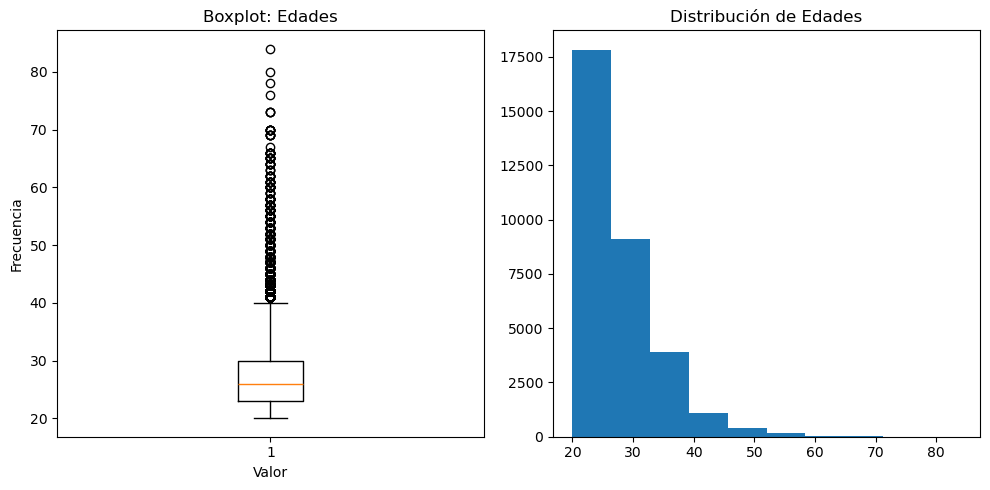

In [61]:
# Boxplot y Distribución de la variable Edades

fig = plt.figure(figsize=(10,5))
gs = gridspec.GridSpec(2, 2)

ax1 = fig.add_subplot(gs[:,0])
ax2 = fig.add_subplot(gs[:,1])

ax1.boxplot(df_clean.person_age)
ax2.hist(df_clean.person_age)

ax1.set_title("Boxplot: Edades")
ax1.set_xlabel("Valor")
ax1.set_ylabel("Frecuencia")

ax2.set_title("Distribución de Edades")

plt.tight_layout()
plt.show()

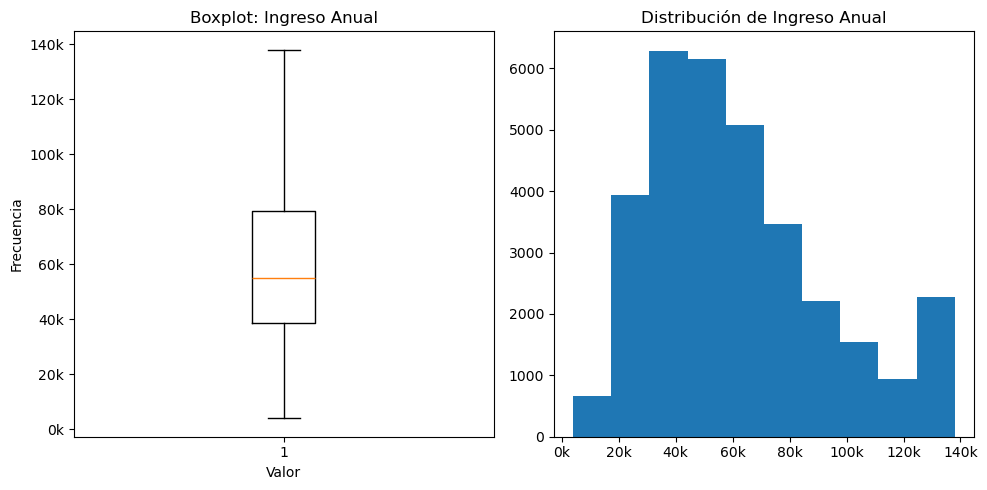

In [62]:
# Boxplot y Distribución de la variable Ingresos

fig = plt.figure(figsize=(10,5))
gs = gridspec.GridSpec(2, 2)

ax1 = fig.add_subplot(gs[:,0])
ax2 = fig.add_subplot(gs[:,1])

ax1.boxplot(df_clean.person_income)
ax2.hist(df_clean.person_income)

ax1.yaxis.set_major_formatter(FuncFormatter(miles))
ax1.set_title("Boxplot: Ingreso Anual")
ax1.set_xlabel("Valor")
ax1.set_ylabel("Frecuencia")

ax2.xaxis.set_major_formatter(FuncFormatter(miles))
ax2.set_title("Distribución de Ingreso Anual")

plt.tight_layout()
plt.show()

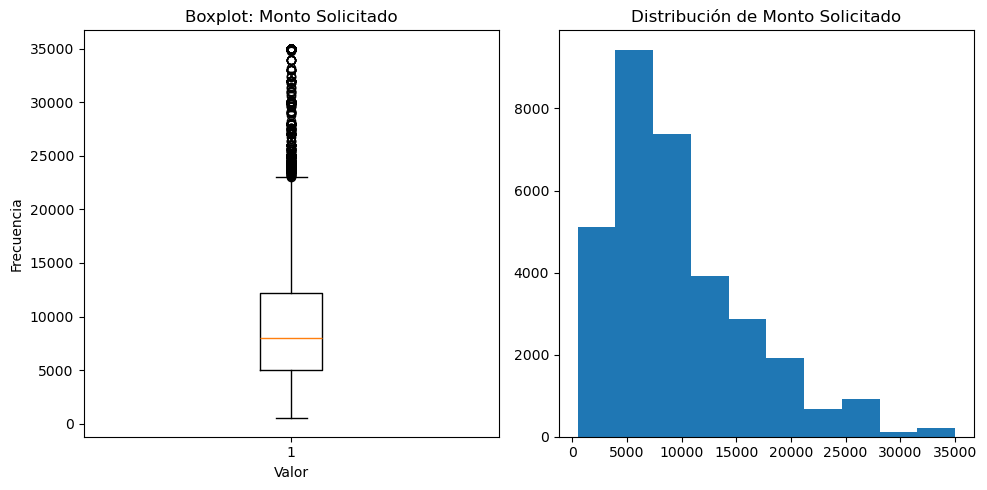

In [63]:
# Boxplot y Distribución de la variable Préstamo

fig = plt.figure(figsize=(10,5))
gs = gridspec.GridSpec(2, 2)

ax1 = fig.add_subplot(gs[:,0])
ax2 = fig.add_subplot(gs[:,1])

ax1.boxplot(df_clean.loan_amnt)
ax2.hist(df_clean.loan_amnt)

ax1.set_title("Boxplot: Monto Solicitado")
ax1.set_xlabel("Valor")
ax1.set_ylabel("Frecuencia")

ax2.set_title("Distribución de Monto Solicitado")

plt.tight_layout()
plt.show()


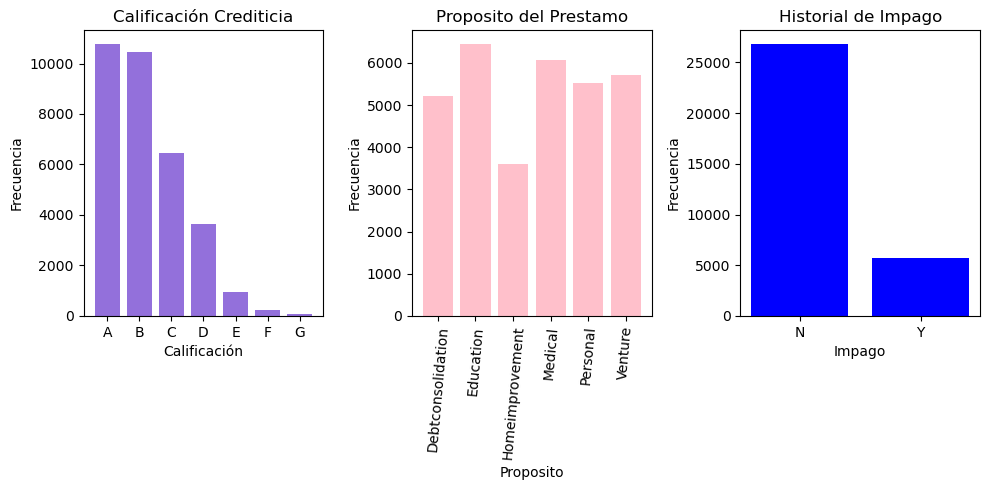

In [26]:
fig = plt.figure(figsize=(10,5))
gs = gridspec.GridSpec(3, 3)

ax1 = fig.add_subplot(gs[:,0])
ax2 = fig.add_subplot(gs[:,1])
ax3 = fig.add_subplot(gs[:,2])

# Gráfico de barras para Calid¿ficacion Crediticia
conteo = df_clean['loan_grade'].value_counts().sort_index()
ax1.bar(conteo.index, conteo.values, color='mediumpurple')
ax1.set_title("Calificación Crediticia")
ax1.set_xlabel("Calificación")
ax1.set_ylabel("Frecuencia")

# Gráfico de barras para Proposito del Prestamo
cont = df_clean['loan_intent'].value_counts().sort_index()
ax2.bar(cont.index, cont.values, color='pink')
ax2.set_title("Proposito del Prestamo")
ax2.set_xlabel("Proposito")
ax2.set_ylabel("Frecuencia")
ax2.tick_params(axis='x', rotation=85)

# Gráfico de barras para Historial de Impago
con = df_clean['cb_person_default_on_file'].value_counts().sort_index()
ax3.bar(con.index, con.values, color='blue')
ax3.set_title("Historial de Impago")
ax3.set_xlabel("Impago")
ax3.set_ylabel("Frecuencia")


plt.tight_layout()
plt.show()


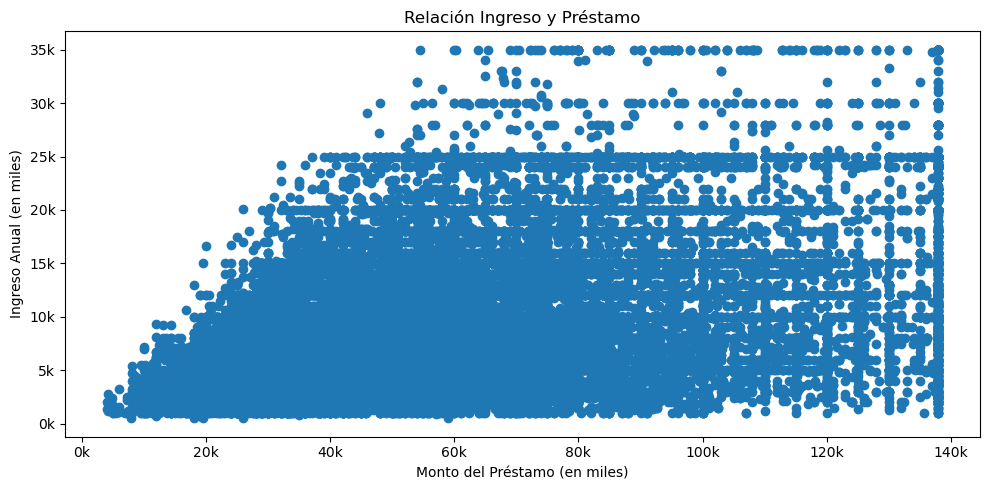

In [27]:
fig, ax = plt.subplots(figsize=(10,5))

ax.scatter(df_clean.person_income,df_clean.loan_amnt)

ax.xaxis.set_major_formatter(FuncFormatter(miles))
ax.yaxis.set_major_formatter(FuncFormatter(miles))
ax.set_title("Relación Ingreso y Préstamo")
ax.set_xlabel("Monto del Préstamo (en miles)")
ax.set_ylabel("Ingreso Anual (en miles)")

plt.tight_layout()
plt.show()

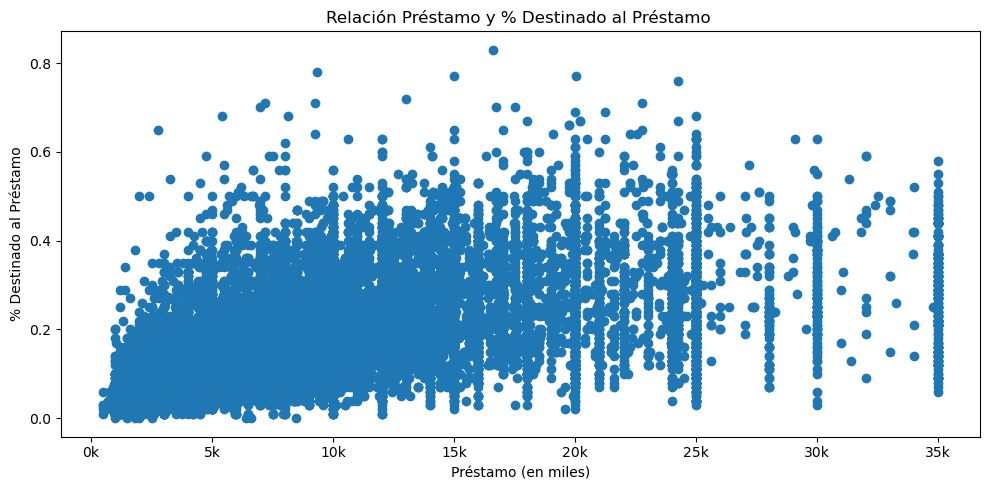

In [28]:
fig, ax = plt.subplots(figsize=(10,5))

ax.scatter(df_clean.loan_amnt, df_clean.loan_percent_income)

ax.xaxis.set_major_formatter(FuncFormatter(miles))
ax.set_title("Relación Préstamo y % Destinado al Préstamo ")
ax.set_xlabel("Préstamo (en miles)")
ax.set_ylabel("% Destinado al Préstamo")


plt.tight_layout()
plt.show()

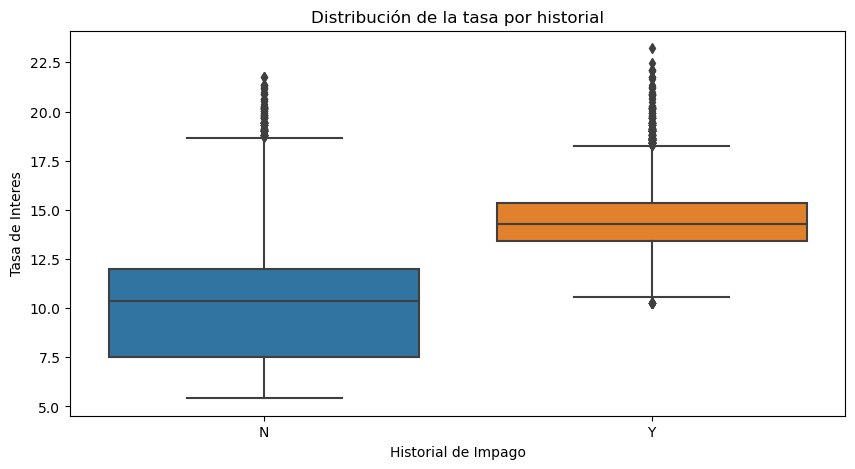

In [64]:
# Boxplot de la tasa por historial
fig, ax = plt.subplots(figsize=(10,5))

sns.boxplot(x="cb_person_default_on_file", y="loan_int_rate", data= df_clean)
plt.title("Distribución de la tasa por historial")
plt.xlabel("Historial de Impago")
plt.ylabel("Tasa de Interes")
plt.show()

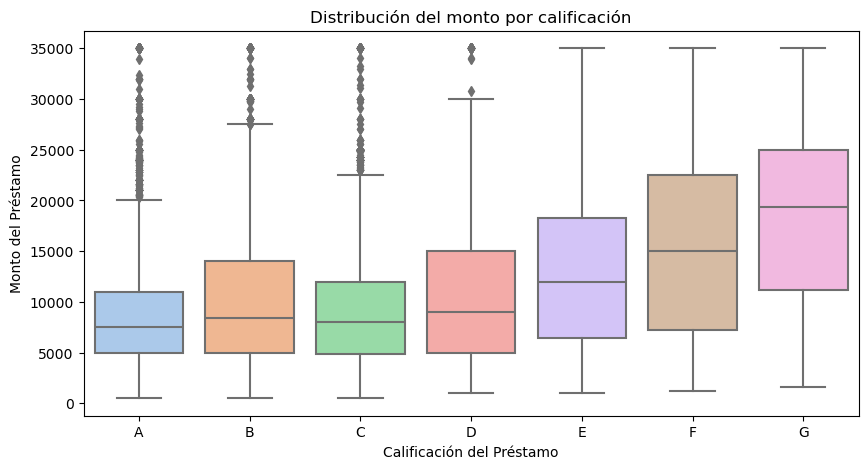

In [65]:
# Boxplot del préstamo por calificación

fig, ax = plt.subplots(figsize=(10,5))

orden = ["A", "B", "C", "D", "E", "F", "G"]

sns.boxplot(x="loan_grade", y="loan_amnt", data = df_clean, palette="pastel", order = orden )
plt.title("Distribución del monto por calificación")
plt.xlabel("Calificación del Préstamo")
plt.ylabel("Monto del Préstamo")
plt.show()

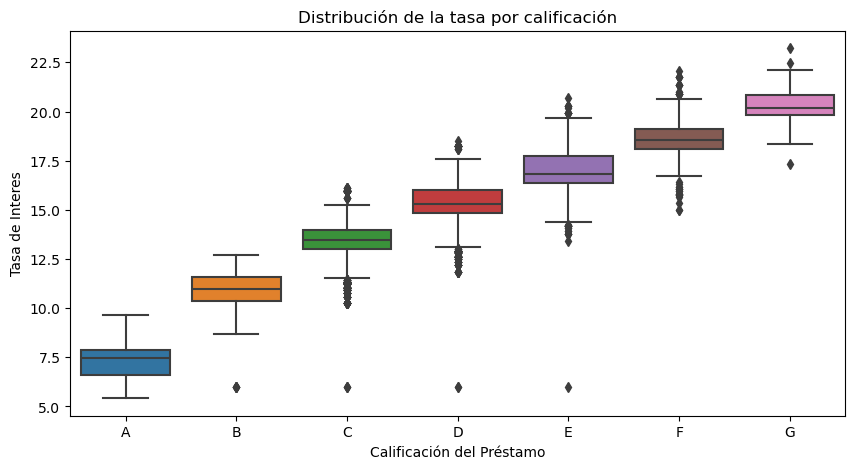

In [66]:
# Boxplot de la tasa de interes por calificación

fig, ax = plt.subplots(figsize=(10,5))

sns.boxplot(x="loan_grade", y="loan_int_rate", data= df_clean, order =  orden)
plt.title("Distribución de la tasa por calificación")
plt.xlabel("Calificación del Préstamo")
plt.ylabel("Tasa de Interes")
plt.show()

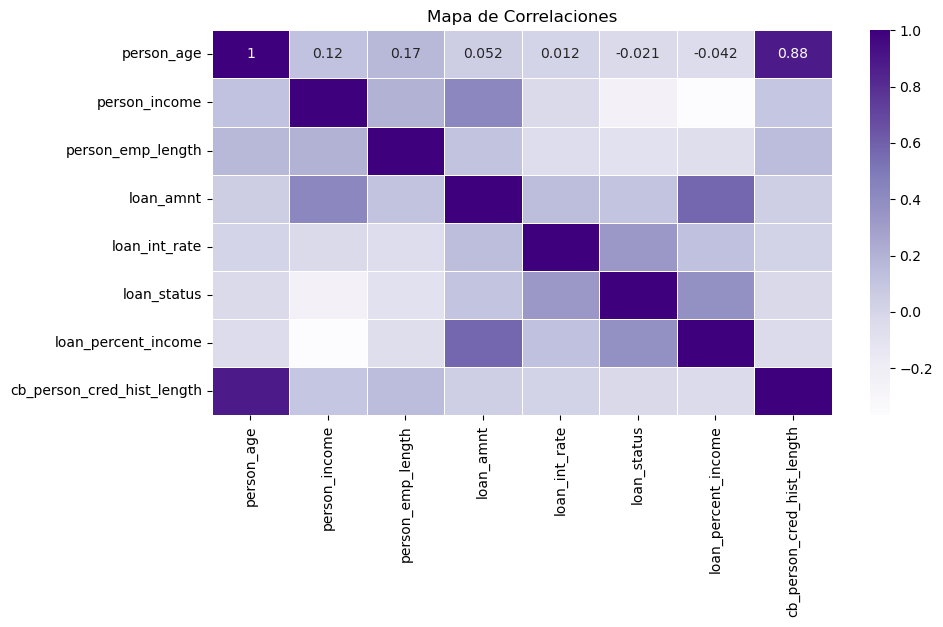

In [32]:
fig, ax = plt.subplots(figsize=(10,5))

# Calcular matriz de correlación
correlacion = df_clean.corr(numeric_only=True)

# Gráfico de calor
sns.heatmap(correlacion, annot=True, cmap="Purples", linewidths=0.5)
plt.title("Mapa de Correlaciones")

plt.show()

### Análisis de variables y relaciones con el riesgo

Recordemos que el objetivo de nuestro proyecto es predecir si un cliente representa un riesgo para una institución financiera, nuestra variable objetivo es loan_status que nos dice si un cliente incumplio con su pago. 
Ahora, vamos a identificar si tenemos patrones, relaciones o riesgos entre esta y las demás variables.


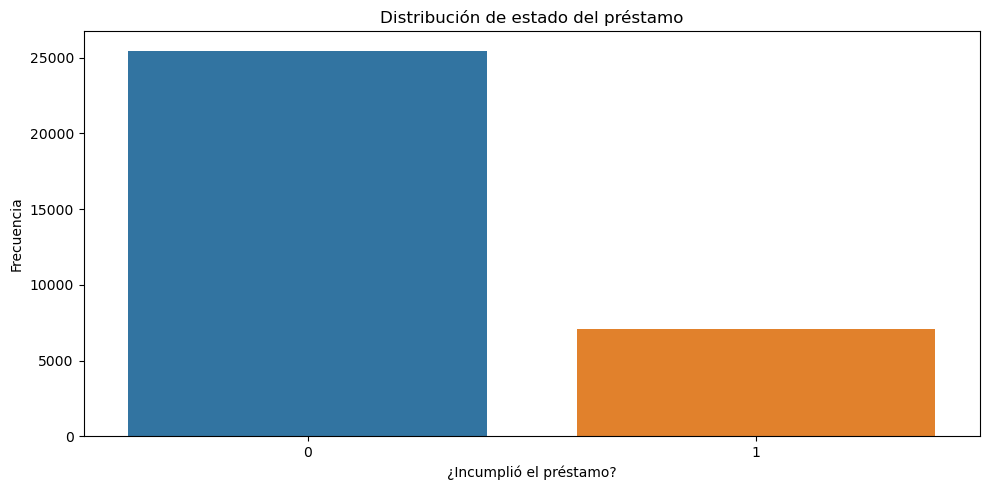

In [33]:
fig = plt.subplots(figsize=(10,5))

# Gráfico de barras para Historial de Impago
sns.countplot(data=df_clean, x='loan_status')
plt.title("Distribución de estado del préstamo")
plt.xlabel("¿Incumplió el préstamo?")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

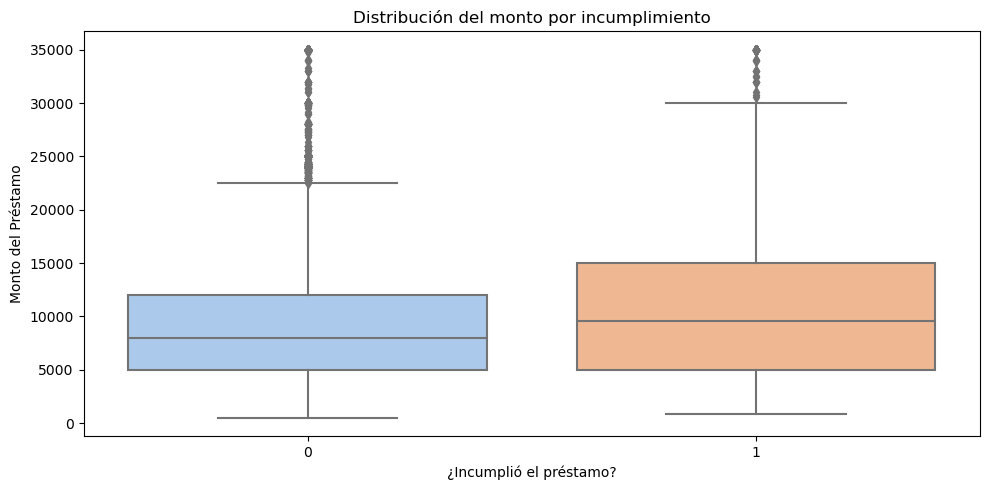

In [67]:
# Boxplot de Préstamo por Incumplimiento

fig = plt.subplots(figsize=(10,5))

sns.boxplot(x="loan_status", y="loan_amnt", data=df_clean, palette="pastel")
plt.title("Distribución del monto por incumplimiento")
plt.xlabel("¿Incumplió el préstamo?")
plt.ylabel("Monto del Préstamo")

plt.tight_layout()
plt.show()

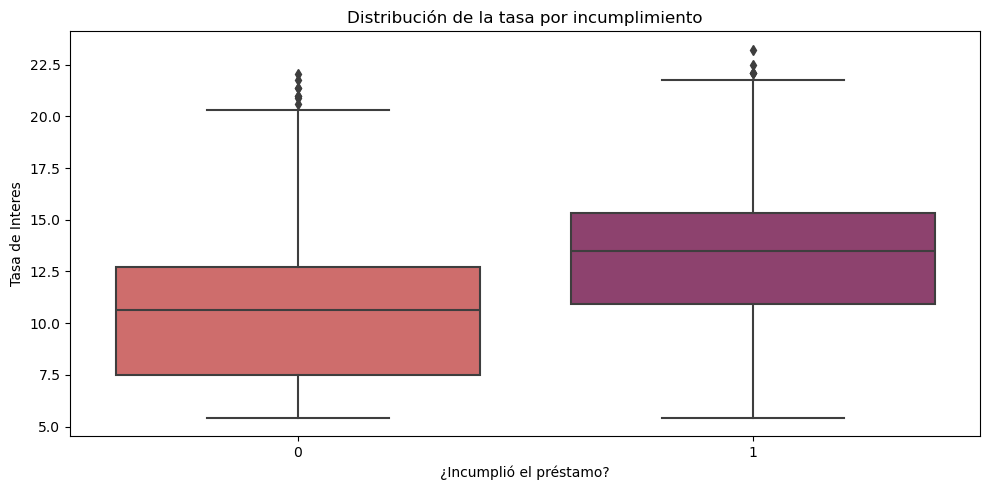

In [68]:
# Boxplot de la tasa por incumplimiento

fig = plt.subplots(figsize=(10,5))

sns.boxplot(x="loan_status", y="loan_int_rate", data= df_clean, palette = "flare")
plt.title("Distribución de la tasa por incumplimiento")
plt.xlabel("¿Incumplió el préstamo?")
plt.ylabel("Tasa de Interes")

plt.tight_layout()
plt.show()

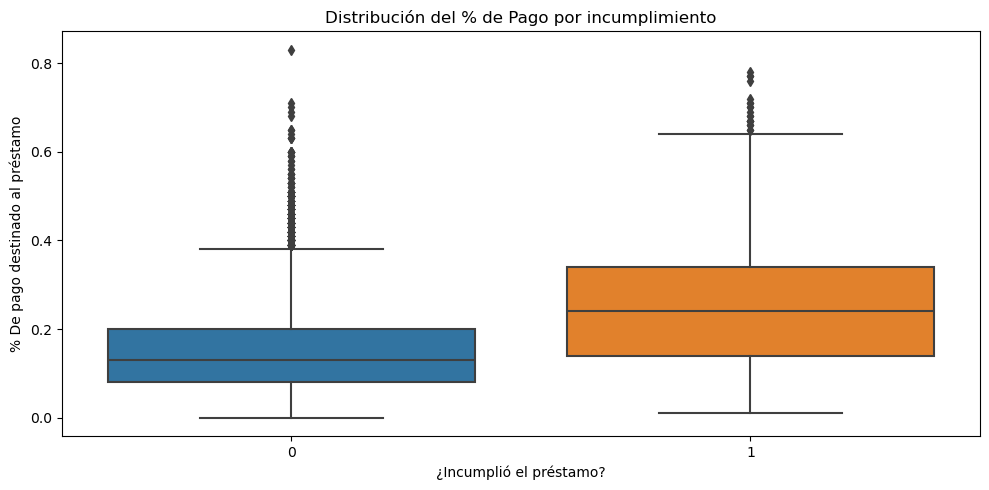

In [69]:
# Boxplot del % destinado al prestamo por incumplimiento

fig = plt.subplots(figsize=(10,5))

sns.boxplot(x="loan_status", y="loan_percent_income", data=df_clean)
plt.title("Distribución del % de Pago por incumplimiento")
plt.xlabel("¿Incumplió el préstamo?")
plt.ylabel("% De pago destinado al préstamo")

plt.tight_layout()
plt.show()

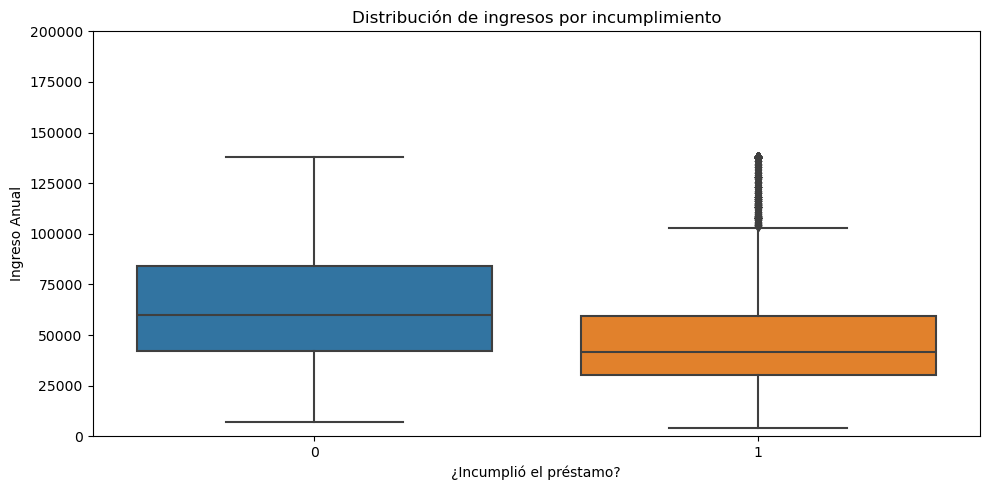

In [70]:
# Boxplot del ingreso anual por incumplimiento

fig = plt.subplots(figsize=(10,5))

sns.boxplot(x="loan_status", y="person_income", data= df_clean)
plt.title("Distribución de ingresos por incumplimiento")
plt.xlabel("¿Incumplió el préstamo?")
plt.ylabel("Ingreso Anual")
plt.ylim(0, 200000) 

plt.tight_layout()
plt.show()

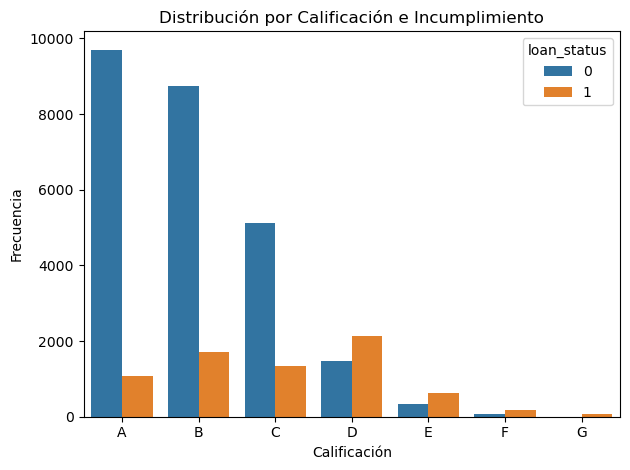

In [71]:
# Distribucion de incumplimineto por calificaci+on

sns.countplot(data=df_clean, x="loan_grade", hue= df_clean["loan_status"].astype(str), order = orden)

plt.title("Distribución por Calificación e Incumplimiento")
plt.xlabel("Calificación")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

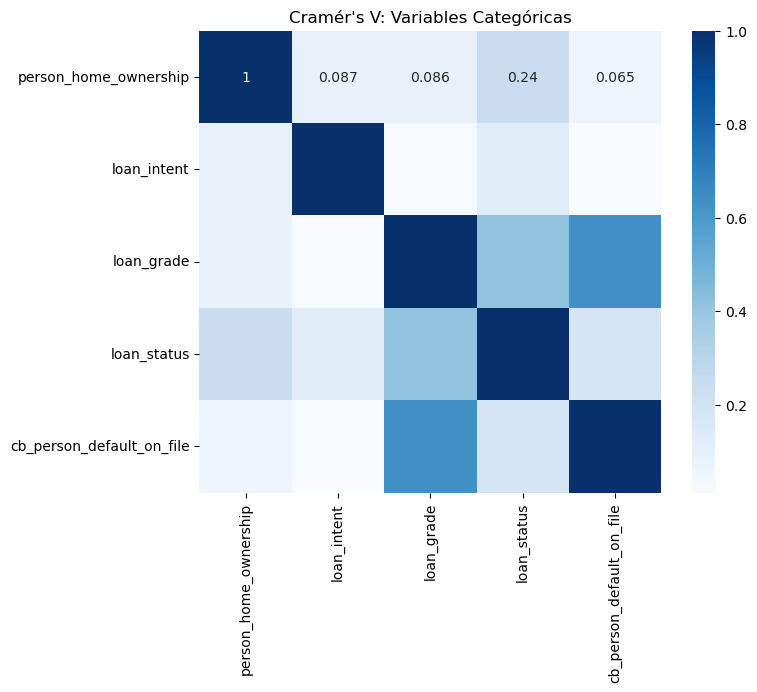

In [39]:

# Función para calcular Cramér's V
def cramers_v(x, y):
    tabla = pd.crosstab(x, y)
    chi2 = chi2_contingency(tabla)[0]
    n = tabla.sum().sum()
    phi2 = chi2 / n
    r, k = tabla.shape
    phi2corr = max(0, phi2 - ((k - 1)*(r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2)/(n - 1)
    kcorr = k - ((k - 1)**2)/(n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Filtrar solo columnas categóricas relevantes
cat_cols = cat_vars

# Crear matriz vacía
matriz = pd.DataFrame(index=cat_cols, columns=cat_cols)

# Calcular Cramér’s V
for col1 in cat_cols:
    for col2 in cat_cols:
        try:
            matriz.loc[col1, col2] = cramers_v(df[col1], df[col2])
        except:
            matriz.loc[col1, col2] = np.nan

# Convertir a float y graficar
matriz = matriz.astype(float)

if matriz.dropna().size == 0:
    print("No se puede graficar: la matriz está vacía o llena de NaN.")
else:
    plt.figure(figsize=(8, 6))
    sns.heatmap(matriz, annot=True, cmap="Blues", square=True)
    plt.title("Cramér's V: Variables Categóricas")
    plt.show()


### 📎 Conclusiones 
Durante el análisis exploratorio de datos se identificaron patrones relevantes que nos ayudaron a comprender mejor las características de los solicitantes y su relación con el incumplimiento de pagos.

Edad: La mayoría de las personas que solicitaron un préstamo tienen entre 20 y 30 años, lo cual es consistente con una población joven, económicamente activa. Se identificaron algunos valores atípicos por encima de los 70 años.

Ingreso anual (person_income): Luego de eliminar valores atípicos extremos, observamos que los ingresos se concentran mayoritariamente entre los $40,000$ y $60,000$ anuales, aunque también existe un segmento de personas con ingresos superiores a $120,000$, lo que sugiere diversidad socioeconómica.

Monto del préstamo (loan_amnt): Aunque existen valores atípicos, estos no se consideran problemáticos dado que representan variabilidad real en los montos solicitados. La mayoría de los préstamos se encuentran entre $5,000$ y $10,00$
0, con una ligera asimetría a la izquierda.

Variables categóricas: La mayoría de los solicitantes tienen calificaciones crediticias buenas (A y B) y más del 50% cuenta con un historial de pago sin incumplimientos. Los propósitos más frecuentes de los préstamos son educación y salud.

Cruce entre ingreso y préstamo: Las personas con ingresos altos o bajos solicitan montos diversos, aunque se observa una alta concentración de préstamos e ingresos bajos, lo que refleja el perfil predominante del dataset.

Relación entre monto solicitado y % de ingreso destinado al préstamo: Existen casos donde personas con préstamos bajos destinan un alto porcentaje de sus ingresos a pagarlos, lo cual puede reflejar fragilidad financiera. Por el contrario, también hay quienes solicitan préstamos altos pero destinan un bajo porcentaje, lo cual puede implicar mayor estabilidad.

Tasa de interés vs historial de impago (cb_person_default_on_file): Las personas con antecedentes de incumplimiento tienen tasas de interés significativamente más altas. Esto sugiere que las instituciones financieras aumentan la tasa como mecanismo de cobertura frente al riesgo.

Monto del préstamo vs calificación crediticia (loan_grade): Los solicitantes con mejores calificaciones tienden a pedir montos más bajos. Se observan valores atípicos en las calificaciones A, B y C, posiblemente porque quienes tienen buen historial acceden a montos mayores.

Tasa de interés vs calificación: Existe una relación clara: a medida que disminuye la calificación crediticia, aumenta la tasa de interés. Esta relación es prácticamente lineal y consistente con las políticas de riesgo bancario.

Correlación: Las variables más correlacionadas fueron person_age con cb_person_cred_hist_length, y loan_amnt con loan_percent_income. El análisis de Cramér's V para variables categóricas indicó que loan_grade y cb_person_default_on_file tienen fuerte relación con loan_status, mientras que variables como loan_intent y home_ownership mostraron muy baja correlación, por lo que se descartaron del modelo.

Desequilibrio en la variable objetivo: Se identificó un desbalance importante en loan_status, con una mayoría de observaciones que sí cumplieron con sus pagos. Esto representa un reto para los modelos predictivos, ya que podrían tener dificultad para identificar a los incumplidos si no se ajustan métricas o umbrales.



## 📈 Ingeniería de Variables y Escalado

In [40]:
# Copia del DataFrame original para no modificar el original
df_final = df_clean.copy()

In [41]:
# Codificar 'cb_person_default_on_file' Y/N → 1/0
df_final['cb_person_default_on_file'] = df_final['cb_person_default_on_file'].map({'Y': 1, 'N': 0})

# Codificar loan_grade (Label Encoding)
le = LabelEncoder()
df_final['loan_grade_encoded'] = le.fit_transform(df_final['loan_grade'])

# Eliminar la original 
df_final.drop('loan_grade', axis=1, inplace=True)

In [42]:
# Escalar columnas con StandardScaler
cols_standard = ['loan_amnt', 'loan_int_rate', 'person_age', 'person_emp_length', 
                 'loan_percent_income', 'cb_person_cred_hist_length']

scaler_std = StandardScaler()
df_final[cols_standard] = scaler_std.fit_transform(df_final[cols_standard])

# Escalar con MinMax
scaler_minmax = MinMaxScaler()
df_final[['person_income']] = scaler_minmax.fit_transform(df_final[['person_income']])

In [43]:
#Elegir columnas finales
columns_end = ['person_age','person_income','person_emp_length','loan_grade_encoded','loan_amnt', 'loan_int_rate', 'loan_status',   
                 'loan_percent_income', 'cb_person_default_on_file','cb_person_cred_hist_length']

df_final = df_final[columns_end]

### 📎 Conclusiones
Use MinMaxScaler porque la variable tenía outliers y valores mucho más altos que el resto del dataset. Esta técnica evita que los modelos se vean sesgados por escalas muy grandes, sin alterar la distribución de los datos.
Use LabelEncoder porque loan_grade tiene un orden lógico, y queremos que el modelo lo aproveche como una señal útil para predecir el riesgo crediticio.

## 🎯 Separar la variable objetivo

In [72]:
# Variables independientes 
X = df_final[['person_age','person_income','person_emp_length','loan_grade_encoded','loan_amnt', 'loan_int_rate',   
                 'loan_percent_income', 'cb_person_default_on_file','cb_person_cred_hist_length']]

# Variable dependiente
y = df_final['loan_status']

## ✂️ Separar datos

In [45]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
print(f"Conjunto de entrenamiento: {X_train.shape}, Conjunto de prueba: {X_test.shape}")

Conjunto de entrenamiento: (26058, 9), Conjunto de prueba: (6515, 9)


In [47]:
print("Filas:", X.shape[0])
print("Columnas:", X.shape[1])

Filas: 32573
Columnas: 9


In [48]:
y.value_counts()

loan_status
0    25466
1     7107
Name: count, dtype: int64

In [49]:
y_train.value_counts()

loan_status
0    20382
1     5676
Name: count, dtype: int64

In [50]:
y_test.value_counts()

loan_status
0    5084
1    1431
Name: count, dtype: int64

# 📉 Modelado

## 🔹 Regresión Logística

In [51]:
# Entrenar modelo
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el rendimiento con el nuevo umbral
print("Precisión (Accuracy):", accuracy_score(y_test, y_pred))
print("Precisión (Precision):", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))


Precisión (Accuracy): 0.8302379125095932
Precisión (Precision): 0.6865671641791045
Recall: 0.41788958770090845
F1-score: 0.5195482189400521

Matriz de Confusión:
[[4811  273]
 [ 833  598]]


In [52]:
# Entrenar el modelo con balanceo
model = LogisticRegression(max_iter=200, class_weight='balanced')
model.fit(X_train, y_train)

# Obtener probabilidades de clase 1 (incumplimiento)
y_proba = model.predict_proba(X_test)[:, 1]

# Ajustar el umbral
umbral_optimo = 0.59  # valor óptimo encontrado con el gráfico
y_pred_umbral = (y_proba >= umbral_optimo).astype(int)

# Evaluar el rendimiento con el nuevo umbral
print("Precisión (Accuracy):", accuracy_score(y_test, y_pred_umbral))
print("Precisión (Precision):", precision_score(y_test, y_pred_umbral))
print("Recall:", recall_score(y_test, y_pred_umbral))
print("F1-score:", f1_score(y_test, y_pred_umbral))
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred_umbral))

Precisión (Accuracy): 0.8089025326170376
Precisión (Precision): 0.5527210884353742
Recall: 0.6813417190775681
F1-score: 0.6103286384976526

Matriz de Confusión:
[[4295  789]
 [ 456  975]]


## 🔹 Random Forest

In [53]:
# Crear el modelo
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Entrenar
rf_model.fit(X_train, y_train)

# Predecir (sin ajustar umbral por ahora)
y_pred_rf = rf_model.predict(X_test)

# Evaluar
print("Precisión:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred_rf))

Precisión: 0.8845740598618572
Precision: 0.7949609035621199
Recall: 0.639412997903564
F1-score: 0.7087529047250195

Matriz de confusión:
[[4848  236]
 [ 516  915]]


In [54]:
# Obtener probabilidades de clase 1
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Ajustar el umbral
umbral_rf = 0.55  # Puedes probar con 0.4, 0.6, etc.
y_pred_rf_umbral = (y_proba_rf >= umbral_rf).astype(int)

# Evaluar con nuevo umbral
print("Precisión:", accuracy_score(y_test, y_pred_rf_umbral))
print("Precision (ajustado):", precision_score(y_test, y_pred_rf_umbral))
print("Recall (ajustado):", recall_score(y_test, y_pred_rf_umbral))
print("F1-score (ajustado):", f1_score(y_test, y_pred_rf_umbral))
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred_rf_umbral))

Precisión: 0.8828856485034535
Precision (ajustado): 0.8162878787878788
Recall (ajustado): 0.6023759608665269
F1-score (ajustado): 0.6932046642541215

Matriz de confusión:
[[4890  194]
 [ 569  862]]


# 📋 Comparación de Modelos

In [55]:
# Crear DataFrame de comparación
df_comparacion = pd.DataFrame({
    'Modelo': [
        'Regresión Logística (umbral 0.59)', 
        'Random Forest (sin ajuste)'
    ],
    'Accuracy': [0.8089, 0.8828],
    'Precision': [0.6874, 0.8168],
    'Recall': [0.6778, 0.6016],
    'F1-score': [0.6091, 0.6929]
})

# Mostrar la tabla
df_comparacion

,Modelo,Accuracy,Precision,Recall,F1-score
0,Regresión Logística (umbral 0.59),0.8089,0.6874,0.6778,0.6091
1,Random Forest (sin ajuste),0.8828,0.8168,0.6016,0.6929


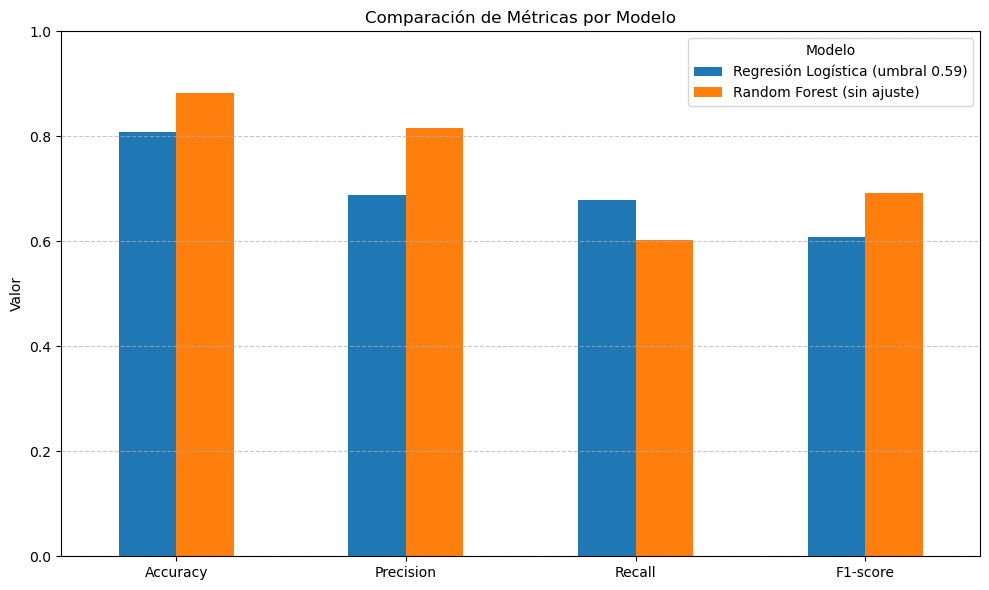

In [56]:
# Transponer para graficar
df_plot = df_comparacion.set_index('Modelo').T

# Plot
df_plot.plot(kind='bar', figsize=(10,6))
plt.title('Comparación de Métricas por Modelo')
plt.ylabel('Valor')
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Modelo')
plt.tight_layout()
plt.show()


### 📎 Conclusiones
Aunque el Random Forest obtiene mejor accuracy y F1-score, su recall es más bajo, lo que significa que puede estar dejando pasar más casos de incumplimiento sin detectar.

El modelo de Regresión Logística, al haber sido calibrado en su umbral, muestra un recall más alto, lo cual es útil si se prioriza identificar a los posibles incumplidos.

Ambos modelos pueden mejorarse aplicando técnicas como balanceo con sobremuestreo (SMOTE), ajuste de umbral en Random Forest, selección de variables, o optimización de hiperparámetros mediante búsqueda en grid (GridSearchCV).



# 💾 Guardado del Modelo Final

In [57]:
# Guardar el modelo en un archivo .joblib
joblib.dump(rf_model, 'modelo_random_forest_credito.joblib')


['modelo_random_forest_credito.joblib']

## ✅ Conclusión Final del Proyecto

Este proyecto tuvo como objetivo construir un modelo predictivo capaz de anticipar el riesgo de incumplimiento en préstamos, utilizando un conjunto de datos con características financieras y crediticias de los solicitantes. A lo largo del proceso se realizó una limpieza exhaustiva de los datos, análisis exploratorio (EDA), transformación de variables categóricas y numéricas, y finalmente, la construcción de modelos supervisados.

Se probaron dos algoritmos: Regresión Logística, por su interpretabilidad, y Random Forest, por su capacidad de modelar relaciones no lineales. Ambos modelos se evaluaron con métricas como precisión, recall y F1-score, especialmente relevantes en contextos de desbalance de clases.

El modelo de Random Forest mostró el mejor desempeño general, logrando un F1-score superior, mientras que la Regresión Logística, al ajustar el umbral de clasificación, fue capaz de mejorar la detección de incumplimientos. Estos hallazgos permitirían a una institución financiera tomar decisiones más informadas y mitigar el riesgo crediticio.

Como próximos pasos, se podrían implementar técnicas de balanceo de clases, validación cruzada y optimización de hiperparámetros para mejorar aún más el rendimiento del modelo.

